In [17]:
## 작업 환경 설정
import sys
import sklearn
import numpy as np
import pandas as pd
import os

## 깔끔한 그래프 출력
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## 데이터 로드

- 데이터 다운로드

In [18]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/rickiepark/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")           ## ./datasets/housing 경로에 데이터셋 저장
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz" ## housing.csv를 압축한 파일

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

fetch_housing_data()

- 데이터 로드

In [57]:
housing = pd.read_csv('/content/datasets/housing/housing.csv')
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


- 데이터 확인 (`info`, `value_counts`, `describe`)

In [20]:
housing.info() # -> total_bedrooms null 있음을 확인함 # -> ocean_proximity 범주형 특성임을 확인함

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [21]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [56]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


- 데이터의 형태를 빠르게 검토하기 위한 숫자형 특성 히스토그램 시각화 (`df.hist`)

In [ ]:
housing.hist(bins=50, figsize=(20, 15)) # bins -> 가로축 구간의 개수 지정
plt.show()

## 데이터 분리

- 계층적 샘플링
  - 테스트 세트가 전체 인구를 대표하도록 각 계층에서 올바른 수의 샘플을 추출하는 것
  - 전문가가 중간 소득이 중간 주택 가격을 예측하는 데 매우 중요하다고 이야기해주었다고 가정하면, 중간 소득을 기준으로 계층적 샘플링을 수행

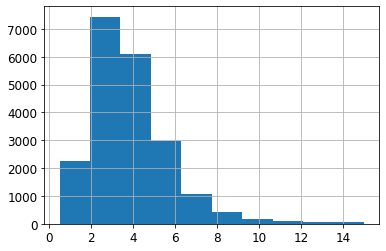

In [25]:
housing["median_income"].hist()

In [26]:
## pd.cut() 함수를 이용하여 중간 소득을 5개의 구간으로 나눔
## 중간 소득 특성은 1.5 ~ 6 사이에 치우친 경향을 보임 (위 시각화 자료 참고)
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [28]:
housing["income_cat"].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

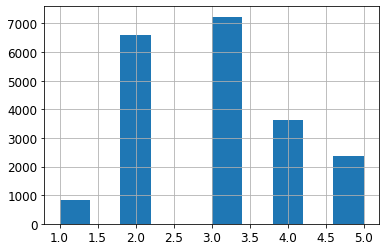

In [29]:
housing["income_cat"].hist()

In [27]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


- 중간 소득을 기준으로 데이터 분할 (`StratifiedShuffleSplit`)
  - 모집단을 게층별 그룹으로 나눈 뒤, 테스트 데이터를 전체 데이터의 각 계층 비율과 동일하게 생성함

In [34]:
from sklearn.model_selection import StratifiedShuffleSplit

## 계층적 샘플링 수행
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42) # n_splits -> 다시 섞기, 분할 반복 횟수

## 훈련, 테스트 데이터셋 인덱스 생성
for train_index, test_index in split.split(housing, housing["income_cat"]):  # split.split() 함수는 훈련, 테스트 데이터셋으로 분할하기 위한 인덱스를 생성
    
    print('train_index: ')
    print(train_index)
    print('test_index: ')
    print(test_index)

    ## 훈련 데이터
    strat_train_set = housing.loc[train_index]
    ## 테스트 데이터
    strat_test_set = housing.loc[test_index]

train_index: 
[12655 15502  2908 ... 19263 19140 19773]
test_index: 
[ 5241 17352  3505 ... 17223 10786  3965]


In [39]:
## 전체 데이터셋, 테스트 데이터셋의 각 계층별 데이터 수 확인
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))
print()
print(housing["income_cat"].value_counts() / len(housing))

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64


- 분할 기준을 위해 생성한 특성 삭제

In [40]:
## 계층적 샘플링을 완료했으니, income_cat 특성 삭제
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [41]:
strat_train_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN


In [42]:
strat_test_set.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
5241,-118.39,34.12,29.0,6447.0,1012.0,2184.0,960.0,8.2816,500001.0,<1H OCEAN
17352,-120.42,34.89,24.0,2020.0,307.0,855.0,283.0,5.0099,162500.0,<1H OCEAN
3505,-118.45,34.25,36.0,1453.0,270.0,808.0,275.0,4.3839,204600.0,<1H OCEAN
7777,-118.10,33.91,35.0,1653.0,325.0,1072.0,301.0,3.2708,159700.0,<1H OCEAN
14155,-117.07,32.77,38.0,3779.0,614.0,1495.0,614.0,4.3529,184000.0,NEAR OCEAN


## 데이터 탐색과 시각화

- 훈련 데이터셋에 대해서만 탐색

In [43]:
housing = strat_train_set.copy()

In [44]:
housing.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND


- 위경도 산점도 시각화

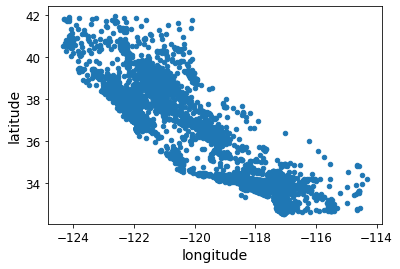

In [46]:
## 위경도 산점도 시각화
housing.plot(kind="scatter", x="longitude", y="latitude")

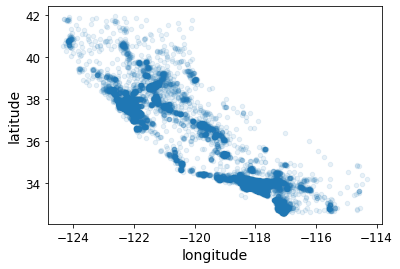

In [47]:
## 데이터 밀집 영역 확인
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

- 주택 가격 시각화
  - 주택 가격은 지역 (예 - 바다와 밀접) 과 인구 밀도에 관련이 크다는 것을 알 수 있음

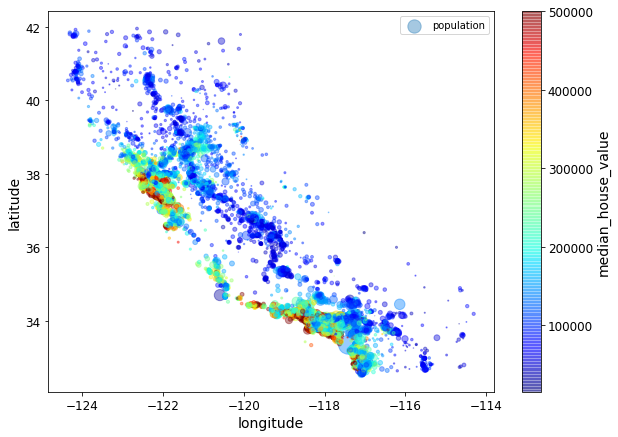

In [48]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             ## s = 마커의 크기를 결정하는 파라미터 -> 구역 인구
             s=housing["population"]/100, label="population", figsize=(10,7),
             ## c = 마커의 색상을 결정하는 파라미터 -> 중간 주택 가격
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)

- 특성 간의 상관관계 조사
  - 선형적인 상관관계 조사
  - 모든 특성 간의 표준 상관계수 (= 피어슨 r) 을 계산 (`corr`)
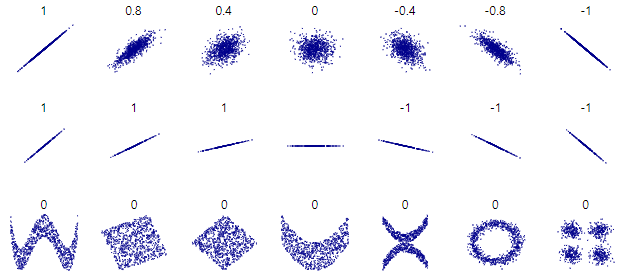

In [53]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [52]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

- 특성 간의 상관관계 조사
  - 숫자형 특성 사이의 산점도 확인 (`scatter_matrix`)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41bffa7b10>,
      dtype=object)

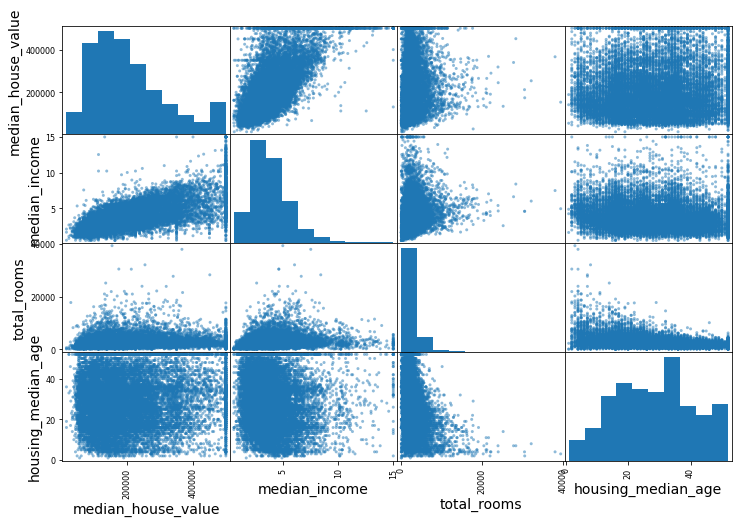

In [54]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

(0.0, 16.0, 0.0, 550000.0)

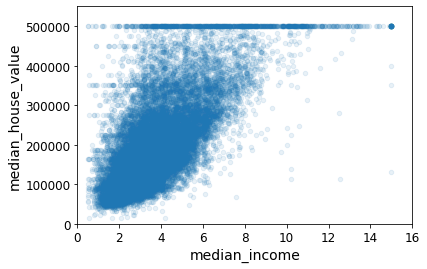

In [60]:
## 가장 유용할 것으로 판단되는 median_income 과의 상관관계 확인
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000]) # median_income min, max & median_house_value min, max

## 500000, 350000 등에서 직선에 가까운 형태의 데이터 분포를 확인할 수 있음
## 알고리즘이 이러한 형태를 학습하지 않도록 해당 구역을 제거해야 함

## 특성 조합 실험

- 데이터 탐색 및 시각화 과정에서 한 것
  - 이상한 데이터 확인
  - 특성 사이의 상관관계 확인
  - 꼬리가 두꺼운 분포를 보이는 데이터는 변형이 필요함을 확인 (예 - 로그 스케일)

- 추가적으로 할 수 있는 실험
  - 특성 조합

In [63]:
## 특성 조합
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]   ## 한 가구 당 방 수
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"] ## 방 하나 당 침대 수
housing["population_per_household"]=housing["population"] / housing["households"] ## 한 가구 당 인구 수

In [62]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [65]:
## 특성 조합 후 상관관계 확인
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## 머신러닝 알고리즘을 위한 데이터 준비

In [66]:
housing = strat_train_set.drop("median_house_value", axis=1) 
housing_labels = strat_train_set["median_house_value"].copy()

In [67]:
housing.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,INLAND
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN


In [68]:
housing_labels.head(5)

12655     72100.0
15502    279600.0
2908      82700.0
14053    112500.0
20496    238300.0
Name: median_house_value, dtype: float64

## 데이터 정제 (수치형 데이터 결측치 처리)

- 결측치 처리 1
  - 해당 구역 제거 `dropna`
  - 전체 특성 삭제 `drop`
  - 어떤 값으로 채움 (예 - 0, 평균, 중간값 등), 테스트 데이터셋 결측치 처리를 위해 해당 값 저장 필요 `fillna`

In [ ]:
'''
housing.dropna(subset=["total_bedrooms"])    # 옵션 1
housing.drop("total_bedrooms", axis=1)       # 옵션 2
median = housing["total_bedrooms"].median()  # 옵션 3
housing["total_bedrooms"].fillna(median, inplace=True)
'''

- 결측치 처리 2
  - 사이킷런의 `SimpleImputer` 를 사용하여 결측치 처리

In [69]:
## SimpleImputer 객체 셍성
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median") ## 결측치를 해당 특성의 중간값으로 대체함, 단, 수치형 특성에 한함

In [70]:
## 텍스트 특성을 제외한 수치형 특성 데이터 복사본 생성
housing_num = housing.drop("ocean_proximity", axis=1)

In [71]:
## SimpleImputer 를 수치형 특성 데이터에 적용
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [72]:
## 각 특성의 중간값 확인
imputer.statistics_

array([-118.51   ,   34.26   ,   29.     , 2119.     ,  433.     ,
       1164.     ,  408.     ,    3.54155])

In [73]:
## 각 특성의 결측치를 중간값으로 대체함 => numpy 배열
X = imputer.transform(housing_num)

In [76]:
## 넘파이 배열을 판다스 데이터프레임으로 변형
housing_tr = pd.DataFrame(X, 
                          columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


## 데이터 정제 (범주형 데이터)

- 범주형 데이터 확인

In [79]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(5)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN


In [80]:
housing_cat.value_counts() ## 범주형 데이터

ocean_proximity
<1H OCEAN          7277
INLAND             5262
NEAR OCEAN         2124
NEAR BAY           1847
ISLAND                2
dtype: int64

- 카테고리를 텍스트에서 숫자로 변환 1
  - `OrdinalEncoder`
  - A, B, C 카테고리를 0, 1, 2 형태로 변환

In [81]:
## 대부분의 ML 알고리즘은 숫자를 다루기 때문에 해당 카테고리를 숫자로 변환
'''
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
'''

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [82]:
## 카테고리 목록 확인
'''
ordinal_encoder.categories_
'''

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

- 카테고리를 텍스트에서 숫자로 변환 2
  - `OneHotEncoder`
  - A, B, C 카테고리를 [1, 0, 0], [0, 1, 0], [0, 0, 1] 형태로 변환
  - 범주의 값을 원-핫 벡터로 바꾸어 줌

In [86]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot ## 희소 행렬 형태로 반환됨

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [87]:
## 희소 행렬을 넘파이 배열로 변환
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [88]:
## 카테고리 목록 확인
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 데이터 변환 파이프라인 생성

- 특성 조합 작업을 위한 파이프라인 생성

In [91]:
col_names = "total_rooms", "total_bedrooms", "population", "households"

## 특성 조합을 위한 열 인덱스 구하기
rooms_ix, bedrooms_ix, population_ix, households_ix = [
                                                       housing.columns.get_loc(c) for c in col_names
                                                       ] # 열 인덱스 구하기

In [92]:
rooms_ix, bedrooms_ix, population_ix, households_ix

(3, 4, 5, 6)

In [93]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True): # *args 또는 **kargs 없음
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self  # 아무것도 하지 않음

    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]               ## 특성 조합
        population_per_household = X[:, population_ix] / X[:, households_ix]     ## 특성 조합

        if self.add_bedrooms_per_room: 
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]               ## 특성 조합
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]

        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [99]:
## 특성 조합 변환기 객체 생성
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
## 특성 조합 수행
housing_extra_attribs = attr_adder.transform(housing.to_numpy())
## 특성 조합 결과 확인
housing_extra_attribs[:3, :] ## 넘파이 형태

array([[-121.46, 38.52, 29.0, 3873.0, 797.0, 2237.0, 706.0, 2.1736,
        'INLAND', 5.485835694050992, 3.168555240793201],
       [-117.23, 33.09, 7.0, 5320.0, 855.0, 2015.0, 768.0, 6.3373,
        'NEAR OCEAN', 6.927083333333333, 2.6236979166666665],
       [-119.04, 35.37, 44.0, 1618.0, 310.0, 667.0, 300.0, 2.875,
        'INLAND', 5.3933333333333335, 2.223333333333333]], dtype=object)

In [100]:
## 넘파이 형태를 판다스 데이터프레임 형태로 변환
## 특성 조합 데이터 열 이름 추가
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)

housing_extra_attribs.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,INLAND,5.485836,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,NEAR OCEAN,6.927083,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.875,INLAND,5.393333,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,NEAR OCEAN,3.886128,1.859213
20496,-118.7,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,<1H OCEAN,6.096552,3.167241


- 특성 스케일링
- 수치형 특성 전처리 파이프라인 생성
  - `MinMaxScaler`
    - 정규화
    - 모든 특성의 범위를 같도록 만들어주는 방법
    - 이상치에 민감함
  - `StandardScaler`
    - 표준화
    - 값에서 평균을 뺀 후, 표준편차로 나눔으로써 분포의 분산이 1이 되도록 함
    - 이상치에 민감하지 않지만 범위의 상하한이 없어 특정 알고리즘에는 문제가 될 수 있음

- `Pipeline` 를 사용한 데이터 변환

In [102]:
from sklearn.pipeline import Pipeline ## 사이킷런의 연속된 변환을 순서대로 처리해주는 클래스
from sklearn.preprocessing import StandardScaler

## 수치형 특성을 전처리하기 위한 파이프라인 정의
## 사이킷런의 Pipeline은 이름/추정기 쌍의 목록을 입력으로 받음
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")), ## 결측치 처리
        ('attribs_adder', CombinedAttributesAdder()),  ## 특성 조합
        ('std_scaler', StandardScaler()),              ## 표준화
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [103]:
housing_num_tr[:3, :]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252]])

- `ColumnTransformer` 를 사용하여 각 열마다 적절한 변환 적용

In [107]:
housing_num.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964


In [105]:
list(housing_num)

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income']

In [108]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)   ## 수치형 특성 열 이름
cat_attribs = ["ocean_proximity"] ## 범주형 특성 열 이름

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),    ## 수치형 특성 열은 수치형 전처리 파이프라인 수행
        ("cat", OneHotEncoder(), cat_attribs), ## 범주형 특성 열은 범주형 전처리 파이프라인 수행
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [110]:
housing_prepared[:3, :]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ]])

In [111]:
housing_prepared.shape

(16512, 16)